# Activity 1 - Milky Way Cluster Map

In this activity, we will make a map of the star clusters in the Milky Way and use it to figure out where the center of our galaxy is!

**Step 0:** To start, run the following cell to import the packages we'll use:

In [26]:
# always start by importing useful packages
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import ascii
%matplotlib inline

## Part 1 - Read in cluster Data

Our data file is "clusters.csv" -- this file contains the Galactic coordinates $l, b$ (in degrees), the distance (in parsecs), the metallicity (abundance of heavy elements), and type (open or globular) for over 2000 star clusters in the Milky Way.

**Step 1:** Modify the cell below to:
- upload "clusters.csv" into Colab
- read in the data file using the astropy.ascii.read() function
- print out the table to see what it looks like
- pull out each column into it's own variable
- convert these arrays to numpy arrays (except the "type" column, since it's a string)


In [27]:
# Read in the data file
filename = 'clusters.csv'
data = ascii.read(filename, format='csv')

# Print out the table
data

﻿index,type,l,b,distance,metallicity
int64,str8,float64,float64,int64,float64
0,open,219.02,83.8,87,0.07
1,open,166.2,-23.49,130,-0.04
2,open,277.53,-7.83,141,-0.29
3,open,289.48,-4.97,151,-0.1
4,open,270.33,-6.87,165,-0.16
5,open,147.48,-6.53,175,0.0
6,open,205.89,32.48,187,0.09
7,open,252.5,-7.68,188,-0.53
8,open,344.24,-9.32,218,-0.58


In [28]:
# Pull out each column into it's own variable
l = data['l']
b = data['b']
d = data['distance']
metallicity = data['metallicity']
type = data['type']

# Convert these arrays to numpy arrays
l = np.array(l)
b = np.array(b)
d = np.array(d)
metallicity = np.array(metallicity)


## Part 2 - Separating by cluster type
**Step 2:** To compare the two types of clusters, let's separate the open clusters from the globular clusters.


There are two ways to do this:

1. **the python way** - This method uses python condition statements to separate subsets of data. It will make an array that has true/false flags for each element, so all the elements that pass the condition get true flags. (This is probably the proper computer science way of doing things.)

2. **the classic astronomer way** - This method is based off how astronomers used to code in the IDL language. You would use the *np.where(condition)* function to find all the indices of an array where a certain condition statement is true.

For example, the cell below determines where the "test" array has values less than 100. The first example (condition statement) will report True flags where the array *x* is less then 100. The second example (np.where) will report the indices where the array is less than 100. Run the cell below to see the results.

In [29]:
test = np.array([1, 10, 100, 1000])

# option 1 - example conditional
small_numbers = test < 100
print(small_numbers)



# option 2 - example np.where()
small_numbers = np.where(test < 100)
print(small_numbers)



[ True  True False False]
(array([0, 1]),)


When you run the cell above, both options report that the first two elements are indeed less than 100.

**Step 3:**  Modify the cell below to find the indices that correspond to open cluster and those that correspond to globular clusters. (You'll save these index arrays as "open" and "glob" for convenience.) You can use either the conditional method or the np.where method.

In [38]:
# split by type

# 1 conditional method
open = type == "open"
glob = type == "globular"
print(open)
print(glob)


# 2 np.where method
open = np.where(type == "open")
glob = np.where(type == "globular")
print(open)
print(glob)

[ True  True  True ... False False False]
[False False False ...  True  True  True]
(array([   0,    1,    2, ..., 2374, 2378, 2381]),)
(array([1283, 1370, 1711, 1770, 1849, 1928, 1935, 1996, 2021, 2063, 2067,
       2083, 2118, 2132, 2140, 2146, 2157, 2164, 2175, 2178, 2180, 2186,
       2189, 2190, 2194, 2213, 2216, 2220, 2223, 2228, 2235, 2236, 2237,
       2240, 2241, 2249, 2252, 2253, 2254, 2259, 2267, 2268, 2269, 2272,
       2273, 2274, 2277, 2282, 2285, 2286, 2289, 2290, 2294, 2295, 2296,
       2297, 2301, 2302, 2303, 2304, 2305, 2306, 2307, 2308, 2309, 2312,
       2313, 2315, 2316, 2318, 2319, 2320, 2321, 2322, 2325, 2326, 2329,
       2330, 2331, 2332, 2333, 2334, 2336, 2338, 2340, 2341, 2342, 2343,
       2344, 2346, 2347, 2351, 2352, 2353, 2354, 2355, 2356, 2358, 2359,
       2360, 2361, 2363, 2364, 2365, 2366, 2367, 2368, 2369, 2371, 2372,
       2375, 2376, 2377, 2379, 2380, 2382, 2383, 2384, 2385, 2386, 2387,
       2388, 2389, 2390, 2391, 2392, 2393, 2394, 2395, 2396,

**Step 4:** Let's make some histogram plots to learn more about our cluster data. The cell below shows an example histogram plot of cluster distance. The first value is the array you want to plot (distance), and the "bins" keyword sets the number of histogram bins.

(a) First, run this cell to see how it looks.

(b) Next, try plotting only the open cluster distances. Similar to indexing a single array value (e.g., x[4]), we can also index a list of indices (e.g., x[ind_array]). Modify the cell below and add the "open" index array to the plot command, then rerun the cell to see how the plot changes.

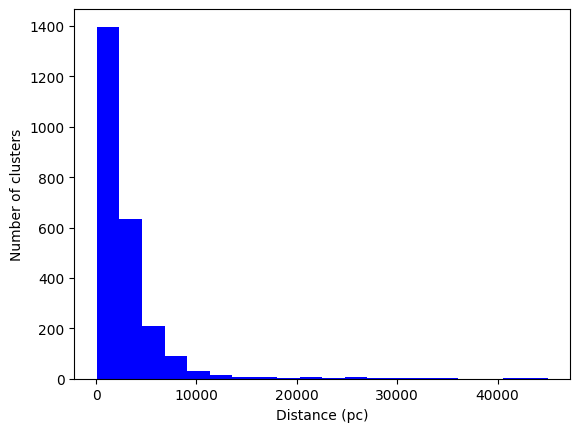

In [31]:
plt.hist(d, bins=20, color='blue')
plt.xlabel('Distance (pc)')
plt.ylabel('Number of clusters')
plt.show()

**Step 5:** Make histogram plots for (1) distance and (2) metallicity. For each,
- plot the open and globular clusters separately (two histograms on the same plot)
- change the axis labels to appropriate values
- change the number of histogram bins as needed
- add a legend

To make a legend: give label names to each plot command and use the legend function:
> plt.plot(x, y, label='Data set 1') \
> plt.plot(x2, y2, label='Data set 2') \
> plt.legend() \
> plt.show()


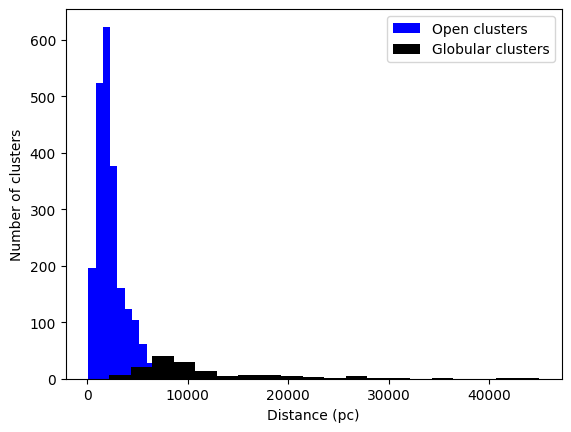

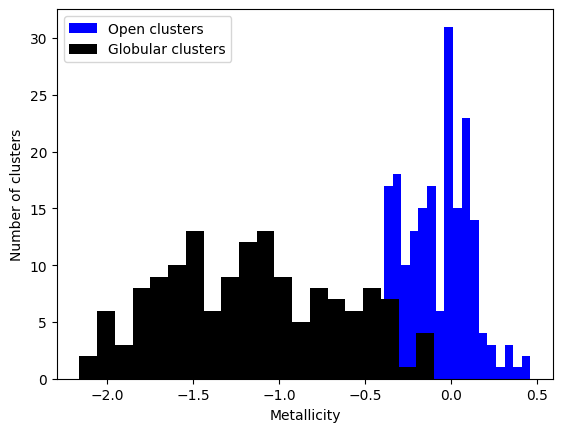

In [32]:
# WRITE YOUR CODE HERE

# distance
plt.hist(d[open], bins=20, color='blue', label='Open clusters')
plt.hist(d[glob], bins=20, color='black', label='Globular clusters')
plt.xlabel('Distance (pc)')
plt.ylabel('Number of clusters')
plt.legend()
plt.show()

# metallicity
plt.hist(metallicity[open], bins=40, color='blue', label='Open clusters')
plt.hist(metallicity[glob], bins=20, color='black', label='Globular clusters')
plt.xlabel('Metallicity')
plt.ylabel('Number of clusters')
plt.legend()
plt.show()



**Question 1:** How do the distances of the open and globular clusters compare? How do the metallicities compare?

\
Write your answer here:

\

## Part 3 - Rectangular coordinates
In order to better visualize the cluster positions, we need to convert the Galactic coordinates ($l, b, d$) into rectangular coordinates ($X, Y, Z$). As shown in the picture below -- X points in the direction of the Galactic center, Y points perpendicular in the disk, and Z points above the disk.

**Step 6:** Calculate the X, Y, Z coordinate of the clusters in the cell below. Note: when using *np.sin()* or *np.cos()*, the angles need to be in **radians**! You can write $\pi$ using *np.pi* or just use 3.14.

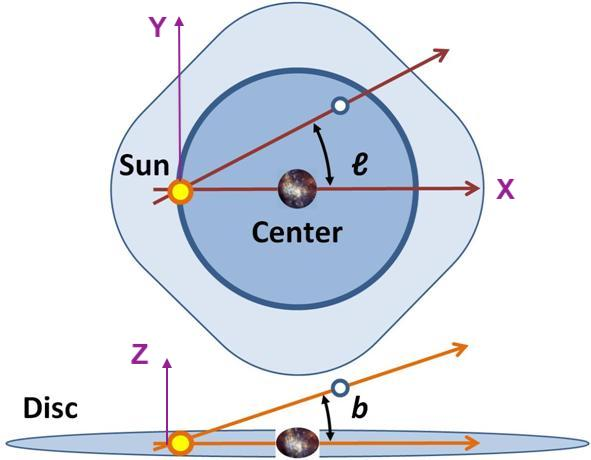

In [33]:
# convert l,b,d to x,y,z
x = d * np.cos(l * np.pi/180.) * np.cos(b * np.pi/180.)
y = d * np.sin(l * np.pi/180.) * np.cos(b * np.pi/180.)
z = d * np.sin(b * np.pi/180.)


## Part 4 - Open cluster positions

**Step 7:** Plot a top view of the galaxy (Y vs X) and a side view (Z vs X) for **only the open clusters**.

- Set the axis limits to appropriate values
- Customize the color/shape of the points however you like
- Add a point at the origin for the Sun
- If time allows, add a legend!



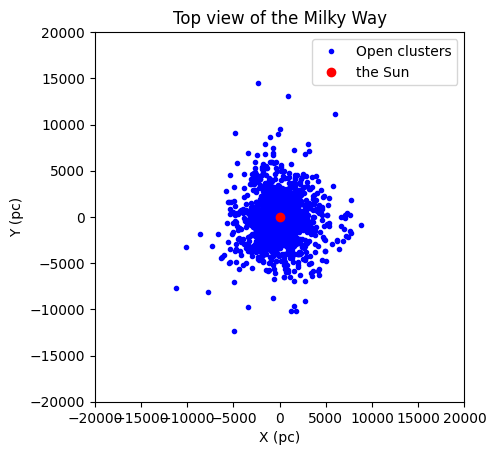

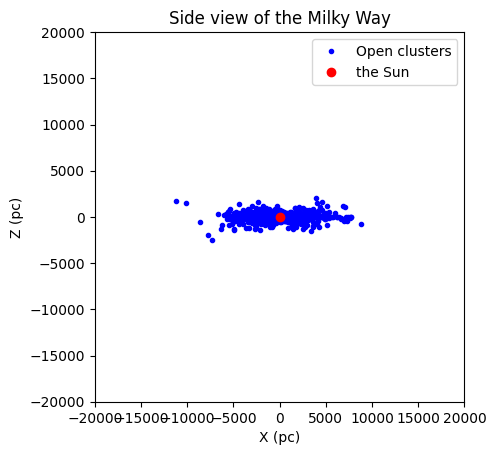

In [34]:
# OPEN CLUSTERS ONLY
plt.plot(x[open], y[open], 'bo', ms=3, label='Open clusters')
plt.plot([0], [0], 'ro', label = 'the Sun')
plt.xlabel('X (pc)')
plt.ylabel('Y (pc)')
plt.title('Top view of the Milky Way')
plt.xlim(-2e4, 2e4)
plt.ylim(-2e4, 2e4)
plt.legend()
plt.gca().set_aspect('equal')
plt.show()


plt.plot(x[open], z[open], 'bo', ms=3, label='Open clusters')
plt.plot([0], [0], 'ro', label = 'the Sun')
plt.xlabel('X (pc)')
plt.ylabel('Z (pc)')
plt.title('Side view of the Milky Way')
plt.xlim(-2e4, 2e4)
plt.ylim(-2e4, 2e4)
plt.legend()
plt.gca().set_aspect('equal')
plt.show()

One way to estimate the location of the galactic center is by finding the center of the cluster positions, because we assume they are distributed uniformly around the galaxy. We can use the above graphs to estimate the location, or we can get a more exact answer by averaging the cluster positions in each direction.

**Step 8:** Calculate the average of the open clusters' X Y and Z coordinates in the cell below, then print out each value. (Hint: you can take the average of a numpy array using *np.mean(array)*.)

In [35]:
# WRITE YOUR CODE HERE

# open cluster mean position
x_mean = np.mean(x[open])
y_mean = np.mean(y[open])
z_mean = np.mean(z[open])

print('Estimated Gal center = ', x_mean, y_mean, z_mean, ' pc')

Estimated Gal center =  -151.61980188931506 -275.34569100293254 -16.94601881248676  pc


\

**Question 2:** Based on the positions of the open clusters, describe in words where you think the Galactic center would be. How far is the Sun from the center (in pc)?

Write your answer here:

\


## Part 5 - Globular cluster positions

**Step 9:** Next, make the same plots as above but now **only for globular clusters**. Modify the axis limits, plot symbols, and legend as needed.

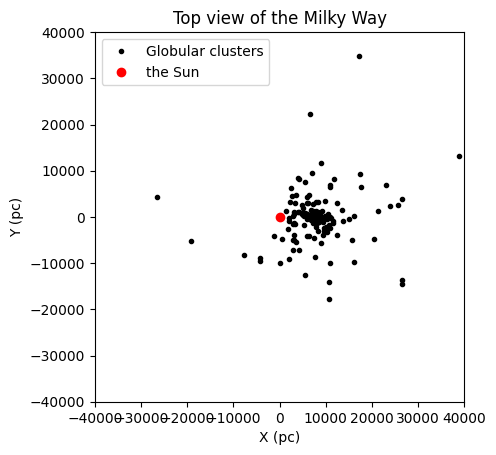

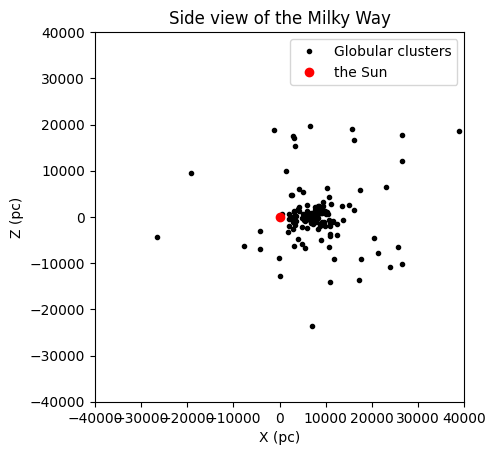

In [36]:
# GLOBULAR CLUSTERS ONLY
plt.plot(x[glob], y[glob], 'ko', ms=3, label='Globular clusters')
plt.plot([0], [0], 'ro', label = 'the Sun')
plt.xlabel('X (pc)')
plt.ylabel('Y (pc)')
plt.title('Top view of the Milky Way')
plt.xlim(-4e4, 4e4)
plt.ylim(-4e4, 4e4)
plt.legend()
plt.gca().set_aspect('equal')
plt.show()


plt.plot(x[glob], z[glob], 'ko', ms=3, label='Globular clusters')
plt.plot([0], [0], 'ro', label = 'the Sun')
plt.xlabel('X (pc)')
plt.ylabel('Z (pc)')
plt.title('Side view of the Milky Way')
plt.xlim(-4e4, 4e4)
plt.ylim(-4e4, 4e4)
plt.legend()
plt.gca().set_aspect('equal')
plt.show()

**Step 10:** Calculate the mean of the globular clusters' X Y and Z coordinates in the cell below, then print out each value.

In [37]:
# WRITE CODE HERE


# globular cluster mean position
x_mean = np.mean(x[glob])
y_mean = np.mean(y[glob])
z_mean = np.mean(z[glob])

print('Estimated Gal center = ', x_mean, y_mean, z_mean, ' pc')


Estimated Gal center =  7792.238701123569 -132.6274479452166 331.3139967509355  pc


\

**Question 3:** Based on the positions of the globular clusters, describe in words where you think the Galactic center would be. How far is the Sun from the center (in pc)?

Write your answer here:

\

**Question 4:** Observationally, why does studying open clusters give us a different map of the Milky Way than studying globular clusters? Which do you think give us a more accurate position for the Galactic center?

Write your answers here:

\


---

## Final instructions
Finish any remaining exercises, then **send me your notebook** to get participation credit. You can download your notebook as an ".ipynb" file and email it, or share the notebook with me through google drive. Remember to answer questions 1-4!

\
If you're finishing the activity at home and run into python problems, don't worry about getting the code exactly right. This isn't a coding class and I'm not grading you on how well you know python. If you're stuck, add a text box and explain what you're trying to do *in words*. Then I'll know you have the right idea and know how to apply the content, even if the python code itself is not working. You're also welcome to stop by my office to ask coding questions anytime!